# Importation des bibliothéques

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# 1. Chargement des données

## 1.2. Données APEC

In [4]:
df = pd.read_csv('Scrapped_Data/Data_APEC_all/all_data_V1_cleaned.csv')
df

,entreprise,type_contrat,date_publication,date_mise_a_jour,salaire,prise_de_poste,experience,metier,statut_du_poste,zone_de_deplacement,...,profil_recherche,langues,savoir_etre,savoir_faire,descriptif_entreprise,nombre_posts,duree,ville,code_postal,departement
0,MICHAEL PAGE INTERNATIONAL FRANCE,CDI,2024-02-29,2024-02-29,40.0,Dès que possible,0,Développeur,Cadre du secteur privé,Pas de déplacement,...,"De formation supérieure en informatique, vous ...",Aucune langue attendue,"['Autonomie', ""Capacité d'analyse"", 'Capacité ...","['Application Web', 'Développement web', 'Info...",Notre client est un éditeur de logiciels dans ...,1,NaN,Aix-en-Provence,13,Bouches-du-Rhône
1,Charlotte Drahy sas,CDI,2024-01-17,2024-03-15,40.0,Dès que possible,5,Développeur,Cadre du secteur privé,Nationale,...,Les compétences requises sont :\nProgrammation...,"Anglais, Français","[""Esprit d'équipe"", 'Motivation', 'Rigueur']","['Analyse des besoins', 'Analyse fonctionnelle...","""Charlotte Drahy sas"" est une société de conse...",1,NaN,Aubagne,13,Bouches-du-Rhône
2,LOEMA,CDI,2024-02-22,2024-02-22,47.5,Dès que possible,4,Développeur,Cadre du secteur privé,Pas de déplacement,...,Vous avez une expérience en : \n- Programma...,Aucune langue attendue,"['Curiosité', 'Goût du challenge']","['ASP.NET', 'Bootstrap Protocol', 'C sharp', '...",Situé au cœur même de la ville de Marseille no...,1,NaN,Marseille,13,Bouches-du-Rhône
3,CELAD,CDI,2024-02-29,2024-02-29,36.0,Dès que possible,1,Développeur,Cadre du secteur privé,Pas de déplacement,...,"Idéalement ingénieur de formation, vous justif...",Aucune langue attendue,"['Autonomie', 'Force de proposition', 'Qualité...","['Framework', 'JavaScript', 'ReactJS', 'TypeSc...","Issu du monde bancaire, #CELAD a été créée en ...",1,NaN,Aix-en-Provence,13,Bouches-du-Rhône
4,EASY PARTNER,CDI,2024-03-01,2024-03-01,40.0,Dès que possible,3,Développeur,Cadre du secteur privé,Pas de déplacement,...,Profil recherché\nNous recherchons un profil a...,Aucune langue attendue,"['Ambition', 'Autonomie', 'Bienveillance', 'Ca...","['Nuxt', 'Vue.js', 'Développement web', 'React...",Easy Partner est un Cabinet de recrutement dig...,1,NaN,Aix-en-Provence,13,Bouches-du-Rhône
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8037,Seyos,CDI,2024-03-15,2024-03-15,52.5,Dès que possible,5,Business developer,Cadre du secteur privé,Pas de déplacement,...,Profil recherché :\nVous avez une expérience s...,Aucune langue attendue,"['Force de proposition', 'Proactivité']","['Manutention', 'Automatisme', 'Cahier des cha...",Seyos est un cabinet de recrutement spécialisé...,1,NaN,Tonneins,47,Lot-et-Garonne
8038,LES COLETTES,CDI,2024-03-12,2024-03-12,NaN,Dès que possible,2,Ingénieur test et recettes,Cadre du secteur privé,Pas de déplacement,...,"Issu(e) d'une formation en informatique, idéal...",Aucune langue attendue,"[""Esprit d'équipe""]","['Cloud', 'Jira', 'SAAS', 'Algorithme', 'Autom...",Editeur de logiciels français multi-sectoriel ...,1,NaN,Villeneuve-sur-Lot,47,Lot-et-Garonne
8039,Armée de l'Air et de l'Espace,CDD,2024-02-21,2024-02-21,34.0,Dès que possible,0,Consultant en cybersécurité,Cadre du secteur public / Armées,Nationale,...,"Jeune diplômé, avec ou sans expérience profess...",Anglais,"[""Capacité d'adaptation"", 'Capacité de communi...","['Analyse des risques', 'Gestion de projet', '...",L’armée de l’Air et de l’Espace a pour mission...,1,de 5 mois,Saint-Dizier,52,Haute-Marne
8040,Armée de l'Air et de l'Espace,CDD,2024-02-16,2024-02-16,22.5,Dès que possible,0,Responsable sécurité informatique,Cadre du secteur public / Armées,Nationale,...,"Diplômé, avec ou sans expérience professionnel...",Anglais,"[""Capacité d'adaptation"", 'Capacité de communi...","['Analyse des risques', 'Gestion de projet', '...",L’armée de l’Air et de l’Espace a pour mission...,1,de 5 mois,Saint-Dizier,52,Haute-Marne


In [5]:
df.shape

(8042, 23)

In [6]:
df.dtypes

entreprise                object
type_contrat              object
date_publication          object
date_mise_a_jour          object
salaire                  float64
prise_de_poste            object
experience                 int64
metier                    object
statut_du_poste           object
zone_de_deplacement       object
secteur_d_activite        object
Teletravail               object
descriptif_poste          object
profil_recherche          object
langues                   object
savoir_etre               object
savoir_faire              object
descriptif_entreprise     object
nombre_posts               int64
duree                     object
ville                     object
code_postal               object
departement               object
dtype: object

In [7]:
df.isna().sum()

entreprise                  0
type_contrat                0
date_publication            0
date_mise_a_jour            0
salaire                  3831
prise_de_poste              0
experience                  0
metier                      0
statut_du_poste             0
zone_de_deplacement         0
secteur_d_activite          0
Teletravail              4376
descriptif_poste            0
profil_recherche            0
langues                     0
savoir_etre                 0
savoir_faire                0
descriptif_entreprise       0
nombre_posts                0
duree                    7579
ville                       0
code_postal                 0
departement                 0
dtype: int64

### Remplacer les valeurs NaN de l'attribut "salaire" avec la moyenne correspondante pour chaque département

In [8]:
moyenne_salaire_par_departement = df.groupby("departement")["salaire"].mean().reset_index()
moyenne_salaire_par_departement.isna().sum()

departement    0
salaire        7
dtype: int64

### Remplacer les valeurs NaN par la moyenne générale des salaires

In [9]:
moyenne_generale_salaire = df["salaire"].mean()
moyenne_salaire_par_departement["salaire"].fillna(moyenne_generale_salaire, inplace=True)
moyenne_salaire_par_departement


,departement,salaire
0,Ain,44.107143
1,Aisne,41.333333
2,Allier,38.833333
3,Alpes-Maritimes,43.045455
4,Alpes-de-Haute-Provence,46.206720
...,...,...
90,Vendée,42.477273
91,Vienne,45.300000
92,Vosges,43.500000
93,Yonne,46.206720


In [10]:
for dep in moyenne_salaire_par_departement["departement"].unique() :
    mask = df["departement"] == dep
    new_salaire = moyenne_salaire_par_departement.loc[moyenne_salaire_par_departement["departement"] == dep, "salaire"].iloc[0]
    df.loc[mask, "salaire"] = df.loc[mask, "salaire"].fillna(new_salaire)

df.isna().sum()

entreprise                  0
type_contrat                0
date_publication            0
date_mise_a_jour            0
salaire                     0
prise_de_poste              0
experience                  0
metier                      0
statut_du_poste             0
zone_de_deplacement         0
secteur_d_activite          0
Teletravail              4376
descriptif_poste            0
profil_recherche            0
langues                     0
savoir_etre                 0
savoir_faire                0
descriptif_entreprise       0
nombre_posts                0
duree                    7579
ville                       0
code_postal                 0
departement                 0
dtype: int64

## 2.2. Taux de chomâge

In [11]:
df_chomage = pd.read_csv('Scrapped_Data/taux_chomage.csv')
df_chomage.drop(columns=['Unnamed: 0'], inplace=True)
df_chomage

,departement,3ᵉ trim. 2023 (p),2ᵉ trim. 2023,3ᵉ trim. 2022
0,Ain,"5,7","5,4","5,4"
1,Aisne,"10,6","10,3","10,3"
2,Allier,"7,9","7,7","7,6"
3,Alpes-de-Haute-Provence,"8,3","8,0","8,3"
4,Hautes-Alpes,"6,7","6,5","6,8"
...,...,...,...,...
97,Guadeloupe,"17,4","19,4","18,3"
98,Martinique,"9,9","10,6","13,3"
99,Guyane,"12,4","13,2","14,1"
100,La Réunion,"20,2","18,6","17,6"


In [12]:
df_chomage.dtypes

departement          object
3ᵉ trim. 2023 (p)    object
2ᵉ trim. 2023        object
3ᵉ trim. 2022        object
dtype: object

In [13]:
df_chomage['3ᵉ trim. 2023 (p)'] = df_chomage['3ᵉ trim. 2023 (p)'].str.replace(',', '.').astype(float)
df_chomage['2ᵉ trim. 2023'] = df_chomage['2ᵉ trim. 2023'].str.replace(',', '.').astype(float)
df_chomage['3ᵉ trim. 2022'] = df_chomage['3ᵉ trim. 2022'].str.replace(',', '.').astype(float)

In [14]:
df_chomage.dtypes

departement           object
3ᵉ trim. 2023 (p)    float64
2ᵉ trim. 2023        float64
3ᵉ trim. 2022        float64
dtype: object

In [15]:
df_chomage

,departement,3ᵉ trim. 2023 (p),2ᵉ trim. 2023,3ᵉ trim. 2022
0,Ain,5.7,5.4,5.4
1,Aisne,10.6,10.3,10.3
2,Allier,7.9,7.7,7.6
3,Alpes-de-Haute-Provence,8.3,8.0,8.3
4,Hautes-Alpes,6.7,6.5,6.8
...,...,...,...,...
97,Guadeloupe,17.4,19.4,18.3
98,Martinique,9.9,10.6,13.3
99,Guyane,12.4,13.2,14.1
100,La Réunion,20.2,18.6,17.6


## 2.3. Données sur la population

In [16]:
df_pop = pd.read_csv('Scrapped_Data/data_Pop.csv')
df_pop[['departement', 'code_postal', 'Région']] = df_pop['departement/code_postal/Région'].str.extract(r'^(.*?)\((\d+)\)\[(.*?)\]$')
df_pop.drop(columns=['departement/code_postal/Région'], inplace=True)
df_pop

,Superficie [en km²],Population,Densite [hab. /km²],departement,code_postal,Région
0,86 504,230 000,4,Guyane,973,Guyane
1,10 000,1 376 000,138,Gironde,33,Aquitaine
2,9 243,327 334,35,Landes,40,Aquitaine
3,9 060,401 500,43,Dordogne,24,Aquitaine
4,8 763,506 755,58,Côte-d'Or,21,Bourgogne
...,...,...,...,...,...,...
95,609,137 408,225,Territoire-de-Belfort,90,Franche-Comté
96,245,1 279 000,5 220,Val-de-Marne,94,Île-de-France
97,236,1 485 000,6 292,Seine-Saint-Denis,93,Île-de-France
98,176,1 517 000,8 619,Hauts-de-Seine,92,Île-de-France


In [17]:
df_pop['Superficie [en km²]'] = df_pop['Superficie [en km²]'].str.replace('\xa0', '').astype(int)
df_pop['Population'] = df_pop['Population'].str.replace('\xa0', '').astype(int)
df_pop['Densite [hab. /km²]'] = df_pop['Densite [hab. /km²]'].str.replace('\xa0', '').astype(int)
df_pop.dtypes

Superficie [en km²]     int64
Population              int64
Densite [hab. /km²]     int64
departement            object
code_postal            object
Région                 object
dtype: object

## 2.4. Taux de pauvrete

In [18]:
df_pauvrete = pd.read_csv('Scrapped_Data/taux_pauvrete.csv')
df_pauvrete.drop(columns=['Unnamed: 0'], inplace=True)
df_pauvrete

,departement,taux de pauvrete total,Moins de 30 ans,30-39 ans,40-49 ans,50-59 ans,60-74 ans,75 ans ou plus
0,Ain,"10,8","15,0","11,8","12,1","10,3","8,4","8,3"
1,Aisne,"18,8","30,4","23,3","21,2","17,7","13,6","10,8"
2,Allier,"16,2","24,8","20,5","18,3","16,1","12,2","12,2"
3,Alpes-de-Haute-Provence,"17,1","24,2","20,7","20,1","17,2","13,8","12,9"
4,Hautes-Alpes,"14,7","22,0","17,4","16,9","14,7","11,4","11,2"
...,...,...,...,...,...,...,...,...
94,Val-de-Marne,"17,2","22,5","17,9","19,4","17,5","14,2","10,6"
95,Val-d'Oise,"17,7","21,9","19,3","20,6","17,3","13,6","10,5"
96,France métropolitaine,"14,9","22,7","17,0","16,7","14,4","11,5","11,0"
97,Martinique,"26,8","46,3","34,1","27,1","25,4","22,4","29,3"


In [19]:
df_pauvrete.dtypes

departement               object
taux de pauvrete total    object
Moins de 30 ans           object
30-39 ans                 object
40-49 ans                 object
50-59 ans                 object
60-74 ans                 object
75 ans ou plus            object
dtype: object

In [20]:
df_pauvrete['taux de pauvrete total'] = df_pauvrete['taux de pauvrete total'].str.replace(',', '.').astype(float)
df_pauvrete['Moins de 30 ans'] = df_pauvrete['Moins de 30 ans'].str.replace(',', '.').astype(float)
df_pauvrete['30-39 ans'] = df_pauvrete['30-39 ans'].str.replace(',', '.').astype(float)
df_pauvrete['40-49 ans'] = df_pauvrete['40-49 ans'].str.replace(',', '.').astype(float)
df_pauvrete['50-59 ans'] = df_pauvrete['50-59 ans'].str.replace(',', '.').astype(float)
df_pauvrete['60-74 ans'] = df_pauvrete['60-74 ans'].str.replace(',', '.').astype(float)
df_pauvrete['75 ans ou plus'] = df_pauvrete['75 ans ou plus'].str.replace(',', '.').astype(float)
df_pauvrete.dtypes

departement                object
taux de pauvrete total    float64
Moins de 30 ans           float64
30-39 ans                 float64
40-49 ans                 float64
50-59 ans                 float64
60-74 ans                 float64
75 ans ou plus            float64
dtype: object

## 2.5. Données sur le logement

In [21]:
logement_df = pd.read_csv("Open Data/donnees_departements_Logement.csv")
logement_df

,code_postal,departement,Nombre de logements sociaux pour 10 000 habitants,Part des logements sociaux de type individuel (en %),Part des logements sociaux de type collectif (en %),Loyer moyen par mètre carré de surface habitable (en €)
0,01,Ain,727,16.8,83.2,6.23
1,02,Aisne,787,24.3,75.7,5.64
2,03,Allier,601,26.6,73.4,5.42
3,04,Alpes-de-Haute-Provence,469,27.3,72.7,6.10
4,05,Hautes-Alpes,569,12.8,87.2,5.44
...,...,...,...,...,...,...
98,971,Guadeloupe,998,22.0,78.0,6.42
99,972,Martinique,1005,0.4,99.6,5.87
100,973,Guyane,699,25.4,74.6,6.59
101,974,La Réunion,967,12.8,87.2,6.40


# 2. Analyse et exploration des données

### Distribution du nombre d'offres d’emploi par département

/tmp/ipykernel_4845/4214960457.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='departement', data = df , palette='husl')


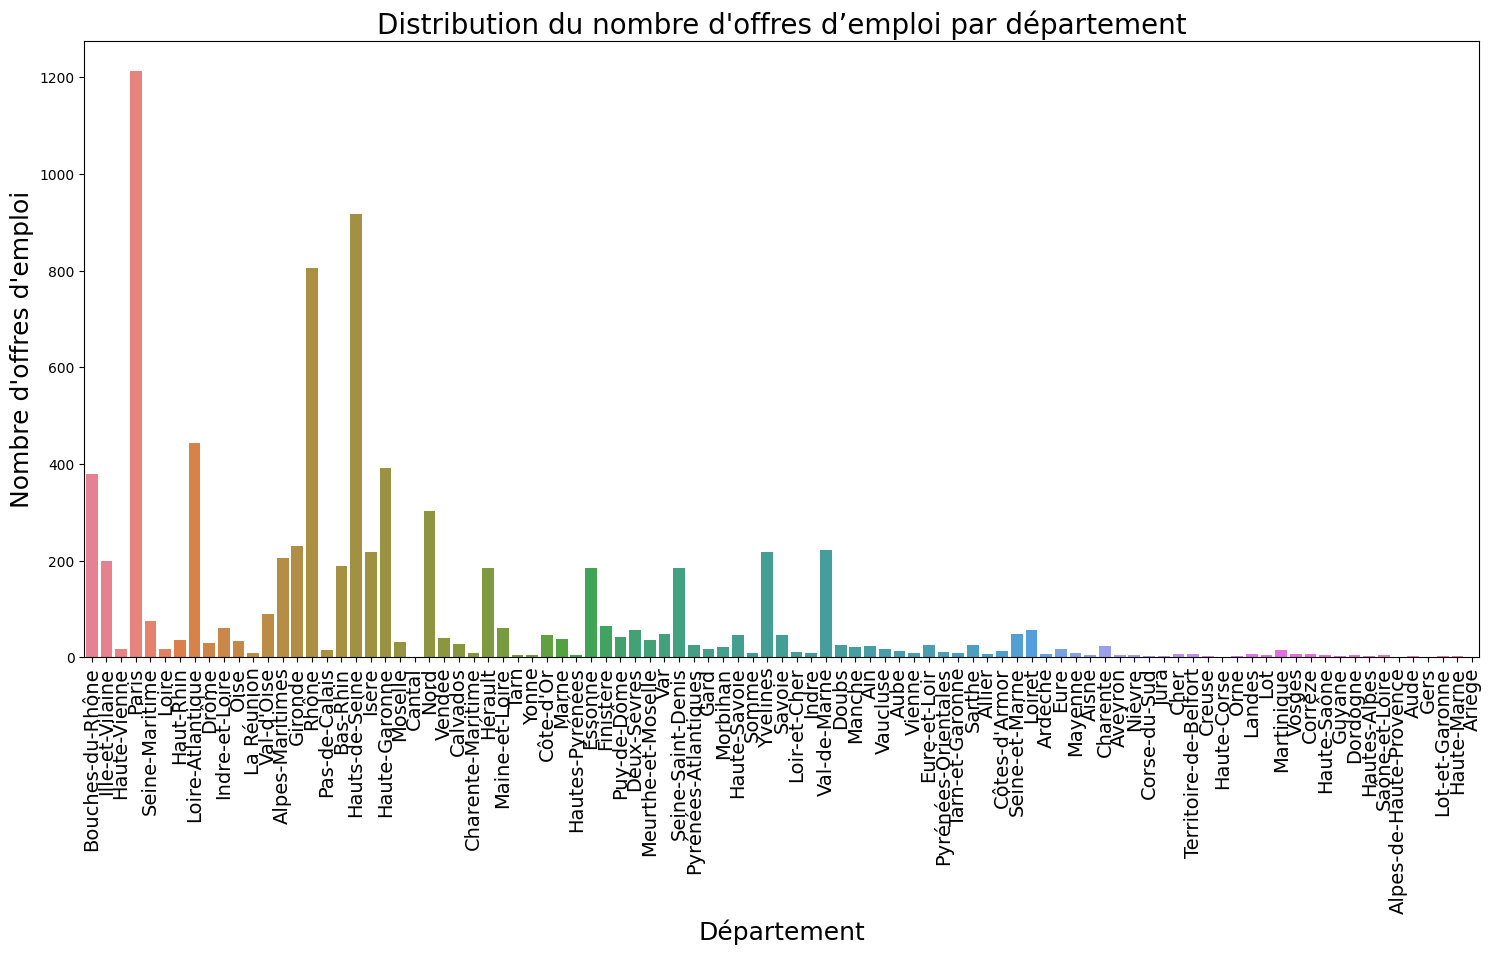

In [22]:
plt.figure(figsize=(18,8))

sns.countplot(x ='departement', data = df , palette='husl')
plt.title("Distribution du nombre d'offres d’emploi par département", fontsize=20)
plt.xlabel('Département', fontsize=18)
plt.ylabel("Nombre d'offres d'emploi", fontsize=18)
plt.xticks(fontsize=14, rotation=90)

plt.show()

/tmp/ipykernel_4845/4280066315.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='metier', data = df , palette='husl')


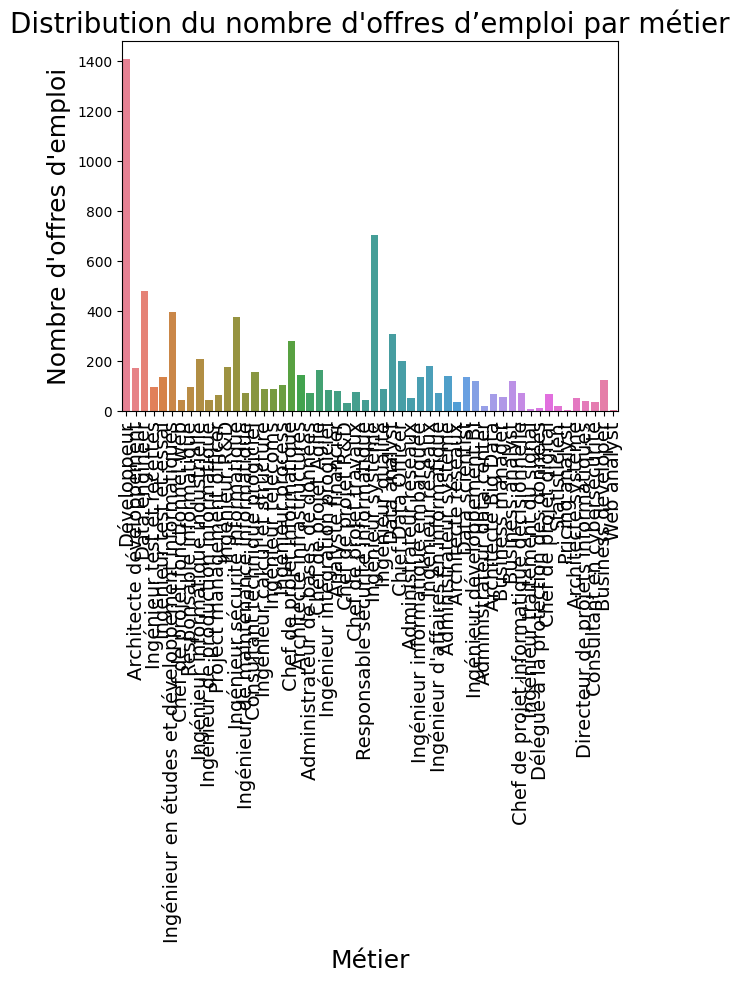

In [23]:
#plt.figure(figsize=(15,8))

sns.countplot(x ='metier', data = df , palette='husl')
plt.title("Distribution du nombre d'offres d’emploi par métier", fontsize=20)
plt.xlabel('Métier', fontsize=18)
plt.ylabel("Nombre d'offres d'emploi", fontsize=18)
plt.xticks(fontsize=14, rotation=90)

plt.show()

# On doit bien nettoyer cette colonne (on peut faire aprés un pie au lieu d'un hist)

/tmp/ipykernel_4845/1632570323.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='type_contrat', data = df , palette='husl')


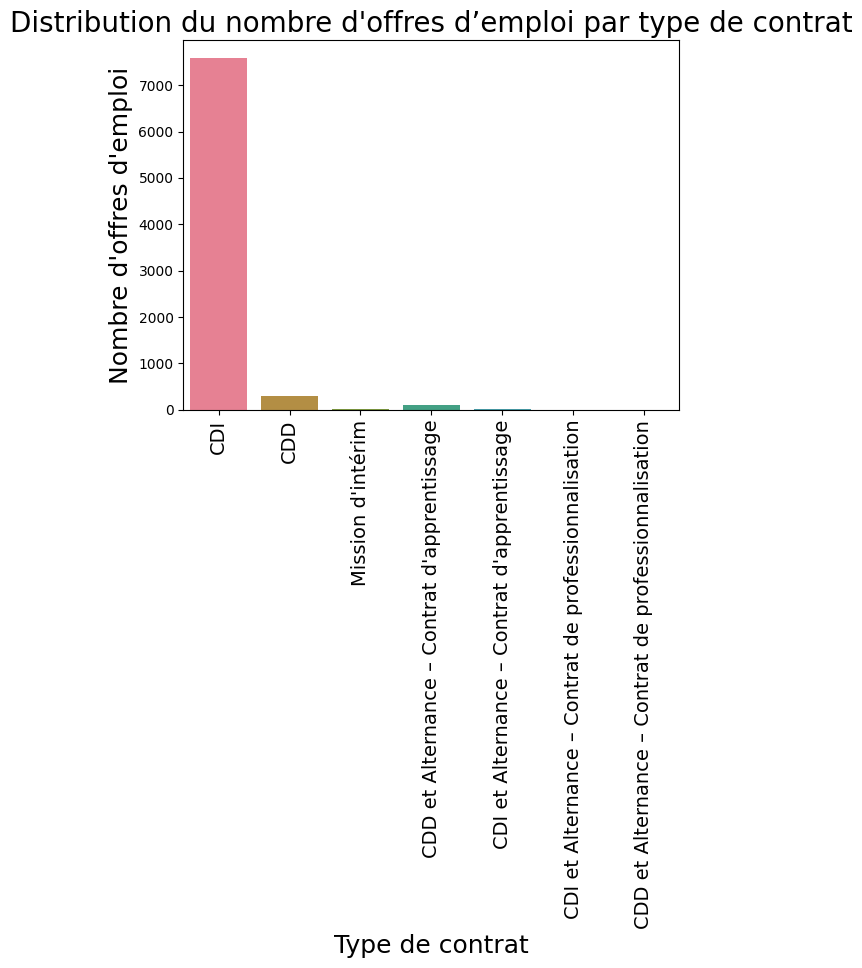

In [24]:
#plt.figure(figsize=(15,4))

sns.countplot(x ='type_contrat', data = df , palette='husl')
plt.title("Distribution du nombre d'offres d’emploi par type de contrat", fontsize=20)
plt.xlabel('Type de contrat', fontsize=18)
plt.ylabel("Nombre d'offres d'emploi", fontsize=18)
plt.xticks(fontsize=14, rotation=90)

plt.show()

In [25]:
# # Calculer le nombre d'offres d'emploi par département
# counts = df['type_contrat'].value_counts()

# # Définir une palette de couleurs personnalisée
# colors = sns.color_palette('pastel')

# # Création du pie chart avec des couleurs personnalisées
# #plt.figure(figsize=(10, 10))
# plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
# plt.title("Répartition du nombre d'offres d’emploi par département")
# plt.axis('equal')  # Assure que le pie chart est dessiné sous forme de cercle
# plt.show()

In [26]:
moyenne_salaires = df.groupby('departement')['salaire'].mean().reset_index()
moyenne_salaires

,departement,salaire
0,Ain,44.107143
1,Aisne,41.333333
2,Allier,38.833333
3,Alpes-Maritimes,43.045455
4,Alpes-de-Haute-Provence,46.206720
...,...,...
90,Vendée,42.477273
91,Vienne,45.300000
92,Vosges,43.500000
93,Yonne,46.206720


Regarder apres la distribution des salire par type de métier

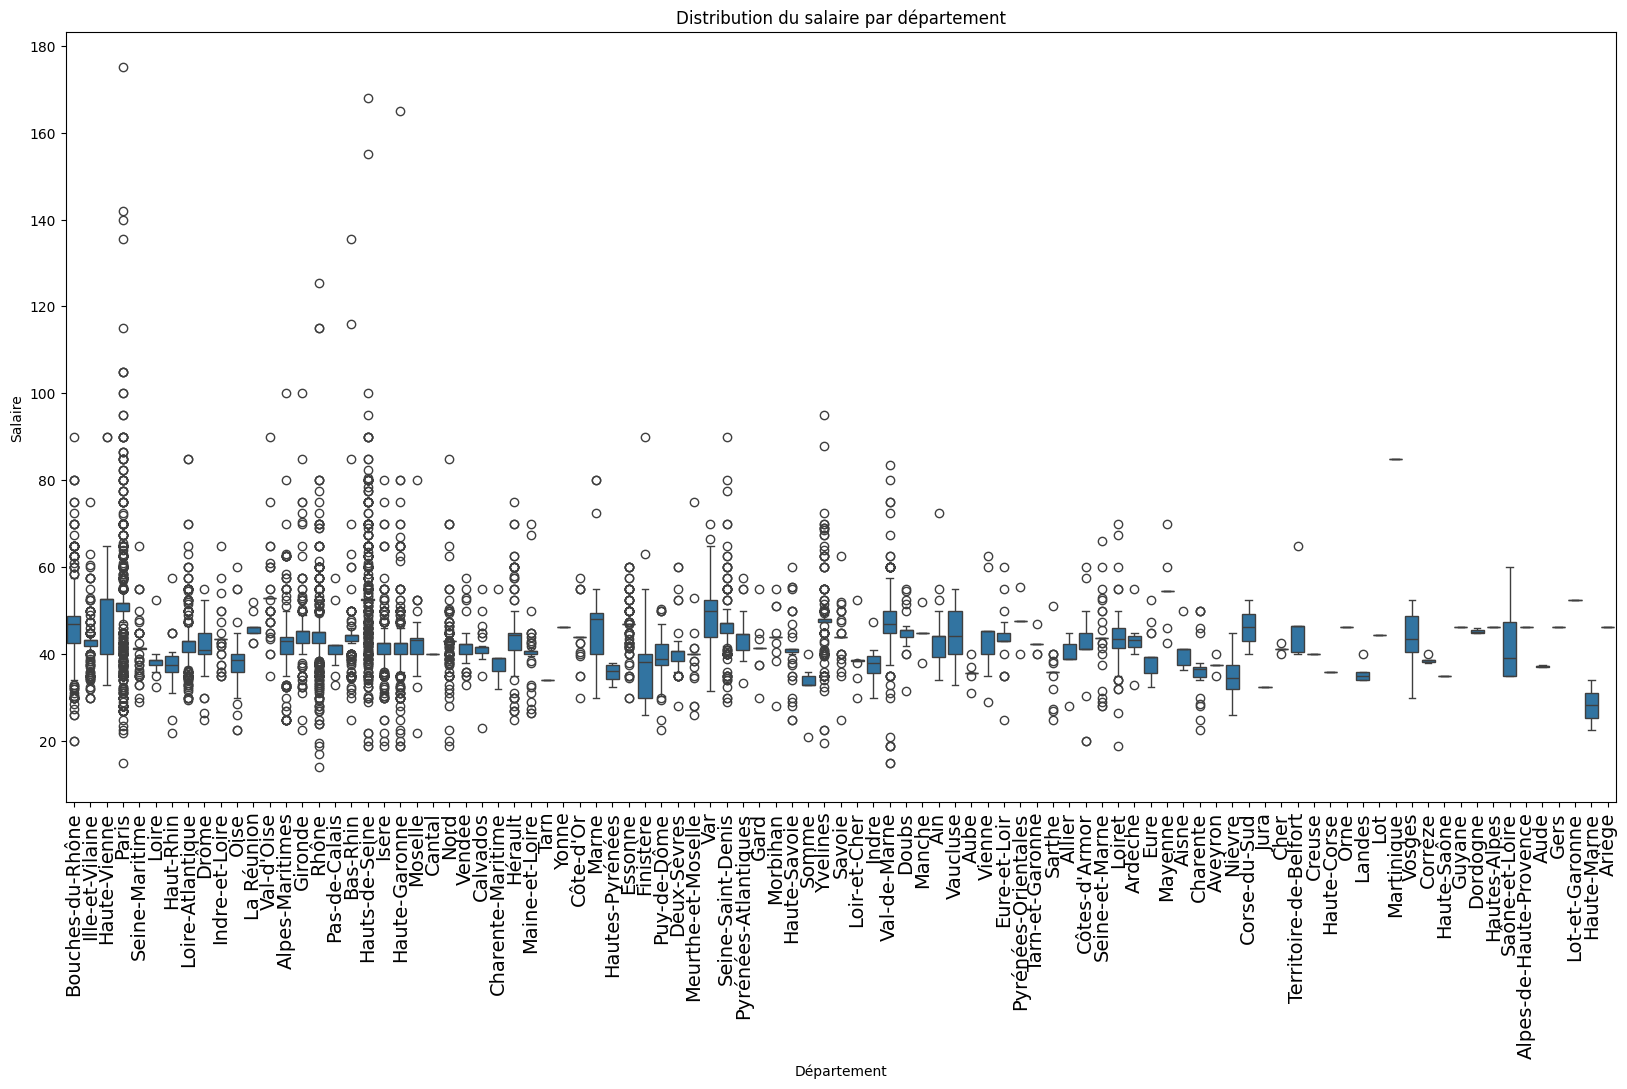

In [27]:
# Visualisation de la distribution du salaire par département avec un boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(x='departement', y='salaire', data=df)
plt.title('Distribution du salaire par département')
plt.xlabel('Département')
plt.ylabel('Salaire')
plt.xticks(fontsize=14, rotation=90)
plt.show()

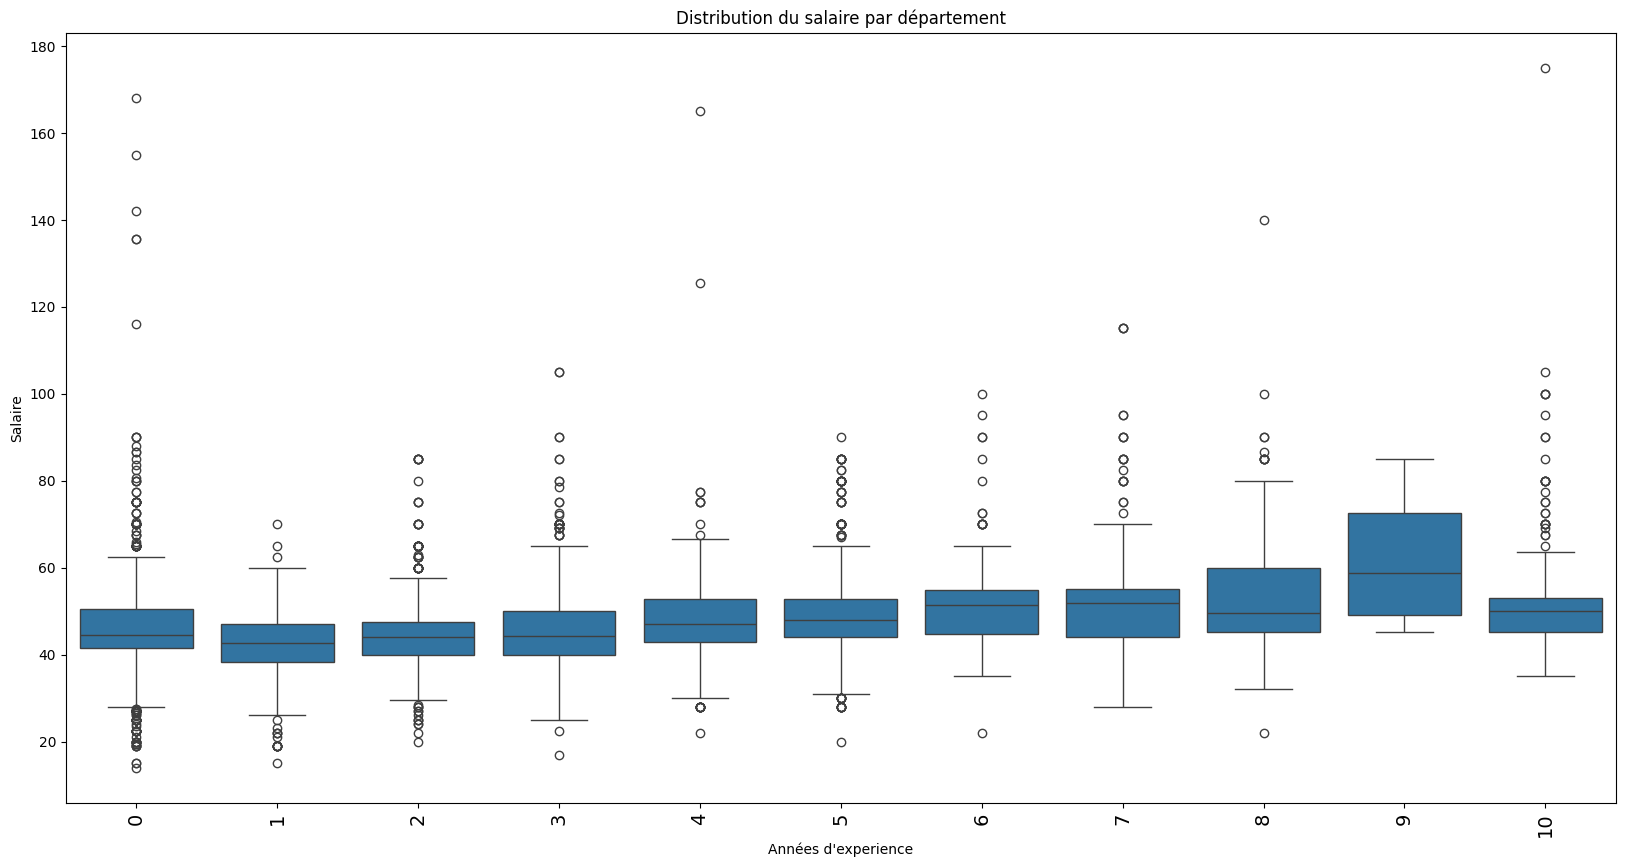

In [28]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='experience', y='salaire', data=df)
plt.title('Distribution du salaire par département')
plt.xlabel('Années d\'experience')
plt.ylabel('Salaire')
plt.xticks(fontsize=14, rotation=90)
plt.show()

In [29]:
df['Date'] = pd.to_datetime(df['date_publication'], format='%Y-%m-%d')
df['Mois_Annee'] = df['Date'].dt.strftime('%Y-%m')

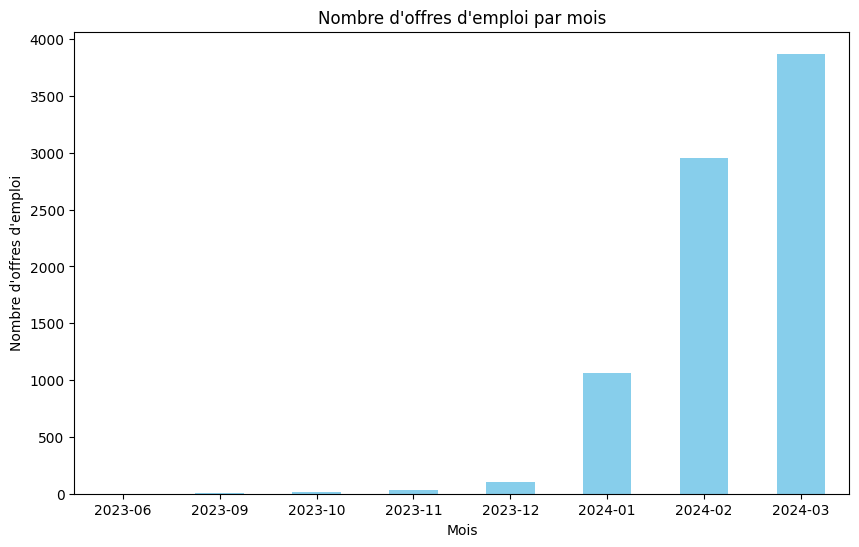

In [30]:

offres_par_mois = df['Mois_Annee'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
offres_par_mois.plot(kind='bar', color='skyblue')
plt.title('Nombre d\'offres d\'emploi par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre d\'offres d\'emploi')
plt.xticks(rotation=0)
plt.show()

In [31]:
len(df['entreprise'].unique())

2196

### Occurrences des langues dans les données

/tmp/ipykernel_4845/2269665252.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=langue_counts.index, y=langue_counts.values, palette="pastel")


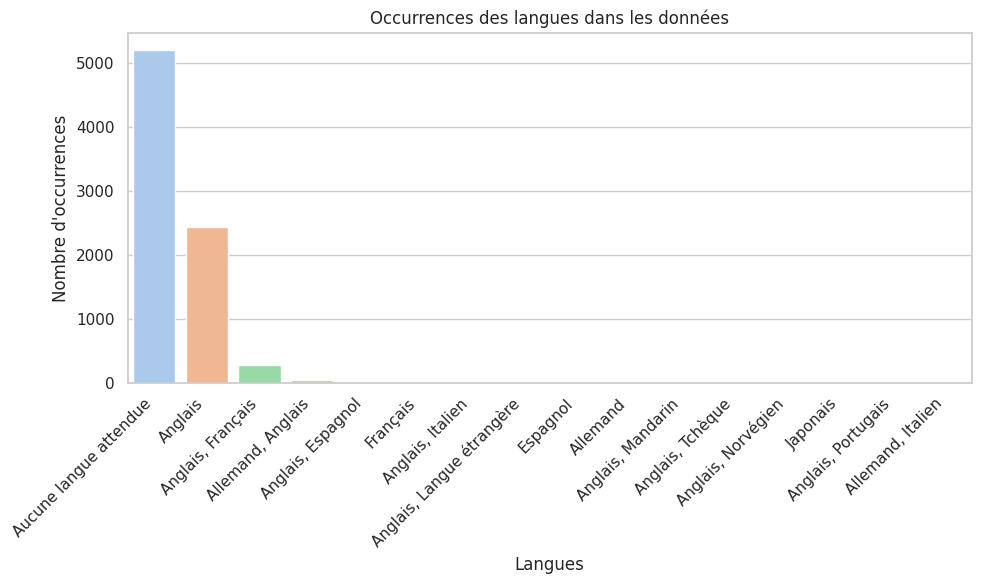

In [32]:
# Supposons que 'langue_counts' contient les comptes par langue
langue_counts = df['langues'].value_counts()

# Créer un graphique à barres avec Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Tracer le graphique à barres
sns.barplot(x=langue_counts.index, y=langue_counts.values, palette="pastel")

# Ajouter des étiquettes aux axes et au titre
plt.xlabel('Langues')
plt.ylabel('Nombre d\'occurrences')
plt.title('Occurrences des langues dans les données')

# Faire pivoter les étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Afficher le graphique
plt.tight_layout()
plt.show()

## Déplacement :

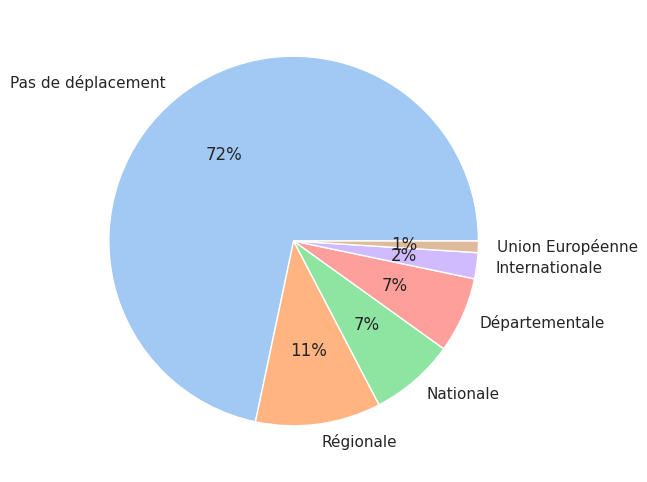

In [33]:
zone_counts = df['zone_de_deplacement'].value_counts()

#define Seaborn color palette to use
colors = sns.color_palette('pastel')
plt.figure(figsize=(10, 6))

#create pie chart
plt.pie(zone_counts.values, labels = zone_counts.index, colors = colors, autopct='%.0f%%')
plt.show()

## Télétravail :

/tmp/ipykernel_4845/2399602481.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=teletravail_counts.index, y=teletravail_counts.values, palette="pastel")


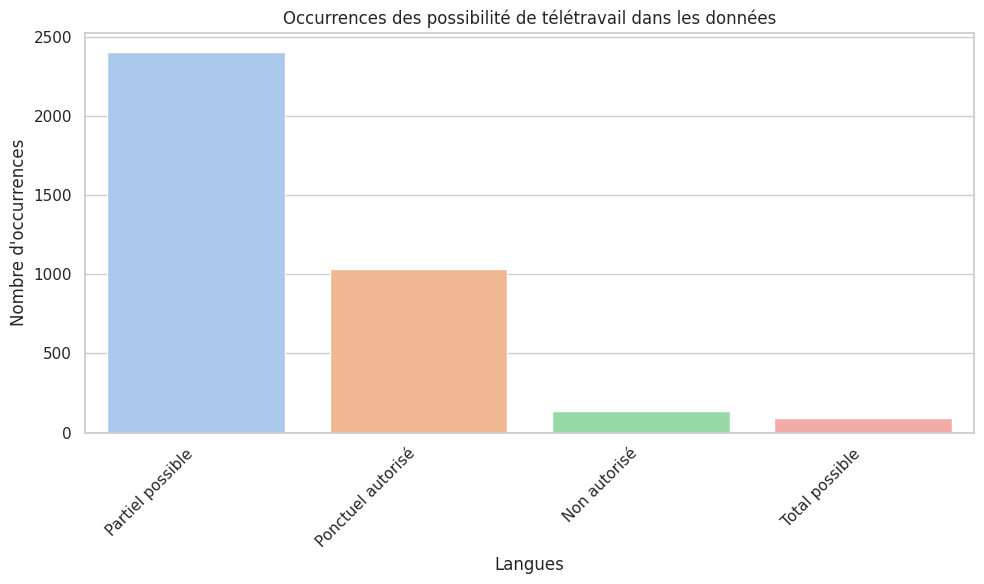

In [34]:
teletravail_counts = df['Teletravail'].value_counts()


# Créer un graphique à barres avec Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Tracer le graphique à barres
sns.barplot(x=teletravail_counts.index, y=teletravail_counts.values, palette="pastel")

# Ajouter des étiquettes aux axes et au titre
plt.xlabel('Langues')
plt.ylabel('Nombre d\'occurrences')
plt.title('Occurrences des possibilité de télétravail dans les données')

# Faire pivoter les étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Afficher le graphique
plt.tight_layout()
plt.show()

## Experience :

<Axes: ylabel='experience'>

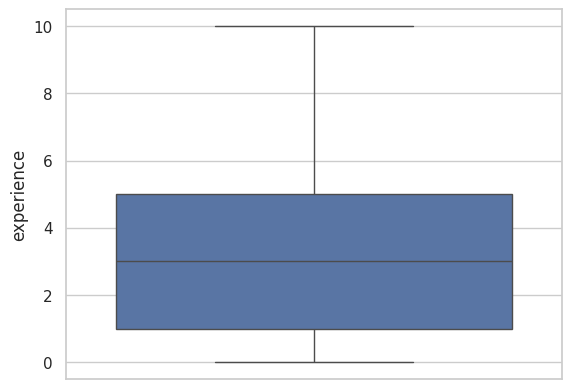

In [35]:
sns.boxplot(data=df['experience'])

In [36]:
df

,entreprise,type_contrat,date_publication,date_mise_a_jour,salaire,prise_de_poste,experience,metier,statut_du_poste,zone_de_deplacement,...,savoir_etre,savoir_faire,descriptif_entreprise,nombre_posts,duree,ville,code_postal,departement,Date,Mois_Annee
0,MICHAEL PAGE INTERNATIONAL FRANCE,CDI,2024-02-29,2024-02-29,40.00000,Dès que possible,0,Développeur,Cadre du secteur privé,Pas de déplacement,...,"['Autonomie', ""Capacité d'analyse"", 'Capacité ...","['Application Web', 'Développement web', 'Info...",Notre client est un éditeur de logiciels dans ...,1,NaN,Aix-en-Provence,13,Bouches-du-Rhône,2024-02-29,2024-02
1,Charlotte Drahy sas,CDI,2024-01-17,2024-03-15,40.00000,Dès que possible,5,Développeur,Cadre du secteur privé,Nationale,...,"[""Esprit d'équipe"", 'Motivation', 'Rigueur']","['Analyse des besoins', 'Analyse fonctionnelle...","""Charlotte Drahy sas"" est une société de conse...",1,NaN,Aubagne,13,Bouches-du-Rhône,2024-01-17,2024-01
2,LOEMA,CDI,2024-02-22,2024-02-22,47.50000,Dès que possible,4,Développeur,Cadre du secteur privé,Pas de déplacement,...,"['Curiosité', 'Goût du challenge']","['ASP.NET', 'Bootstrap Protocol', 'C sharp', '...",Situé au cœur même de la ville de Marseille no...,1,NaN,Marseille,13,Bouches-du-Rhône,2024-02-22,2024-02
3,CELAD,CDI,2024-02-29,2024-02-29,36.00000,Dès que possible,1,Développeur,Cadre du secteur privé,Pas de déplacement,...,"['Autonomie', 'Force de proposition', 'Qualité...","['Framework', 'JavaScript', 'ReactJS', 'TypeSc...","Issu du monde bancaire, #CELAD a été créée en ...",1,NaN,Aix-en-Provence,13,Bouches-du-Rhône,2024-02-29,2024-02
4,EASY PARTNER,CDI,2024-03-01,2024-03-01,40.00000,Dès que possible,3,Développeur,Cadre du secteur privé,Pas de déplacement,...,"['Ambition', 'Autonomie', 'Bienveillance', 'Ca...","['Nuxt', 'Vue.js', 'Développement web', 'React...",Easy Partner est un Cabinet de recrutement dig...,1,NaN,Aix-en-Provence,13,Bouches-du-Rhône,2024-03-01,2024-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8037,Seyos,CDI,2024-03-15,2024-03-15,52.50000,Dès que possible,5,Business developer,Cadre du secteur privé,Pas de déplacement,...,"['Force de proposition', 'Proactivité']","['Manutention', 'Automatisme', 'Cahier des cha...",Seyos est un cabinet de recrutement spécialisé...,1,NaN,Tonneins,47,Lot-et-Garonne,2024-03-15,2024-03
8038,LES COLETTES,CDI,2024-03-12,2024-03-12,52.50000,Dès que possible,2,Ingénieur test et recettes,Cadre du secteur privé,Pas de déplacement,...,"[""Esprit d'équipe""]","['Cloud', 'Jira', 'SAAS', 'Algorithme', 'Autom...",Editeur de logiciels français multi-sectoriel ...,1,NaN,Villeneuve-sur-Lot,47,Lot-et-Garonne,2024-03-12,2024-03
8039,Armée de l'Air et de l'Espace,CDD,2024-02-21,2024-02-21,34.00000,Dès que possible,0,Consultant en cybersécurité,Cadre du secteur public / Armées,Nationale,...,"[""Capacité d'adaptation"", 'Capacité de communi...","['Analyse des risques', 'Gestion de projet', '...",L’armée de l’Air et de l’Espace a pour mission...,1,de 5 mois,Saint-Dizier,52,Haute-Marne,2024-02-21,2024-02
8040,Armée de l'Air et de l'Espace,CDD,2024-02-16,2024-02-16,22.50000,Dès que possible,0,Responsable sécurité informatique,Cadre du secteur public / Armées,Nationale,...,"[""Capacité d'adaptation"", 'Capacité de communi...","['Analyse des risques', 'Gestion de projet', '...",L’armée de l’Air et de l’Espace a pour mission...,1,de 5 mois,Saint-Dizier,52,Haute-Marne,2024-02-16,2024-02


## Entreprise : 

/tmp/ipykernel_4845/48193691.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=entreprise_counts.index, y=entreprise_counts.values, palette="pastel")


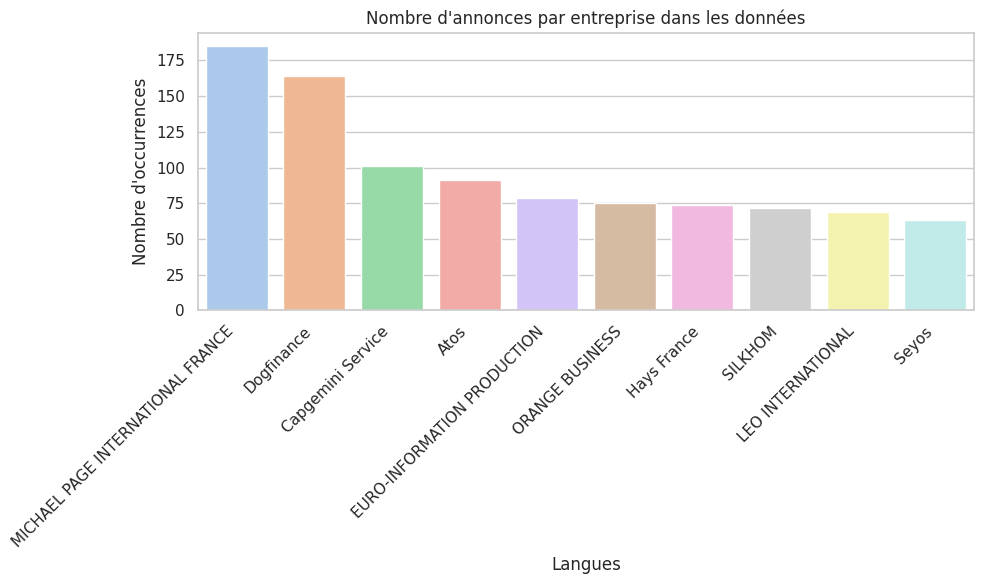

In [37]:
entreprise_counts = df['entreprise'].value_counts()[:10]
# print(entreprise_counts)

# Créer un graphique à barres avec Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Tracer le graphique à barres
sns.barplot(x=entreprise_counts.index, y=entreprise_counts.values, palette="pastel")

# Ajouter des étiquettes aux axes et au titre
plt.xlabel('Langues')
plt.ylabel('Nombre d\'occurrences')
plt.title('Nombre d\'annonces par entreprise dans les données')

# Faire pivoter les étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Afficher le graphique
plt.tight_layout()
plt.show()

<Axes: xlabel='metier'>

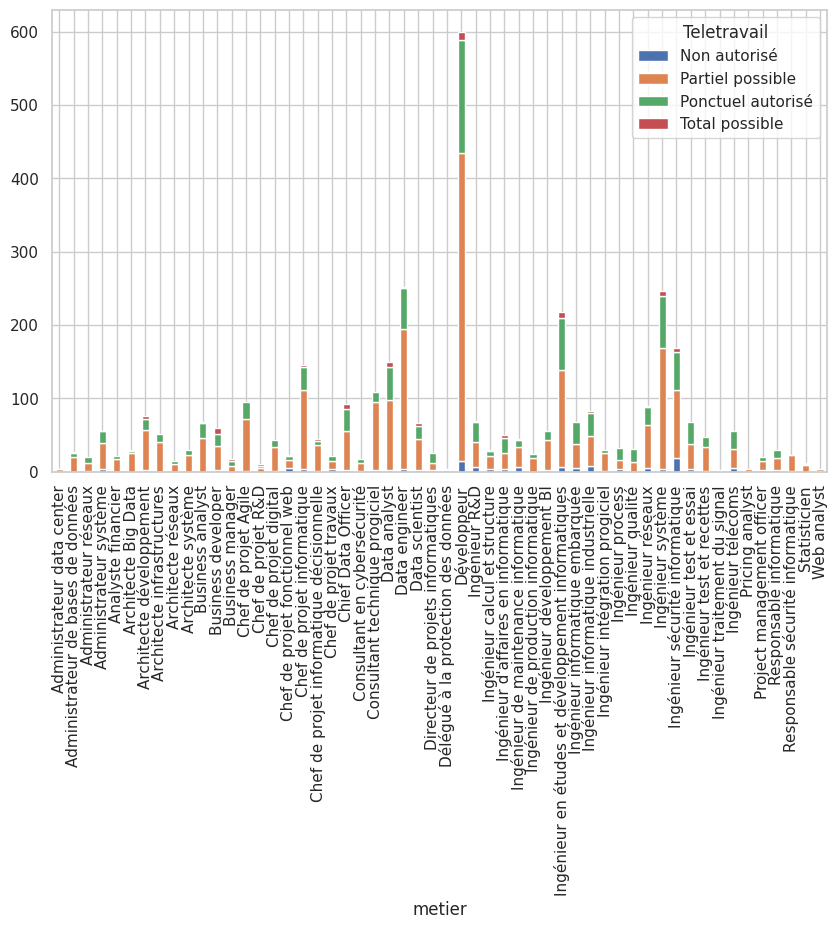

In [38]:
# Analyse de la relation entre le type de contrat et le département => Pas trés interessants 
contingency_table = pd.crosstab(df['metier'], df['Teletravail'])
contingency_table.plot(kind='bar', stacked=True,figsize=(10,6))


In [39]:
# from wordcloud import WordCloud

# # Créer un nuage de mots pour les descriptions de poste
# text = ' '.join(df['descriptif_poste'])
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# plt.figure(figsize=(10, 6))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Nuage de mots pour les descriptions de poste')
# plt.show()

## Salaire :

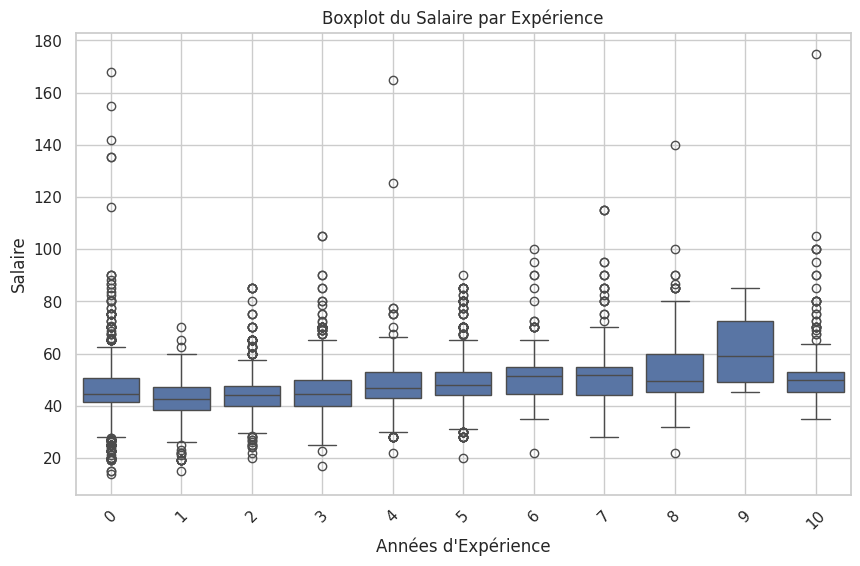

In [40]:

plt.figure(figsize=(10, 6))  # Ajustez la taille de la figure au besoin
sns.boxplot(x='experience', y='salaire', data=df)
plt.title('Boxplot du Salaire par Expérience')
plt.xlabel('Années d\'Expérience')
plt.ylabel('Salaire')
plt.xticks(rotation=45)  # Faire pivoter les étiquettes d'expérience pour une meilleure lisibilité
plt.grid(True)  # Ajouter une grille pour une meilleure visualisation
plt.show()

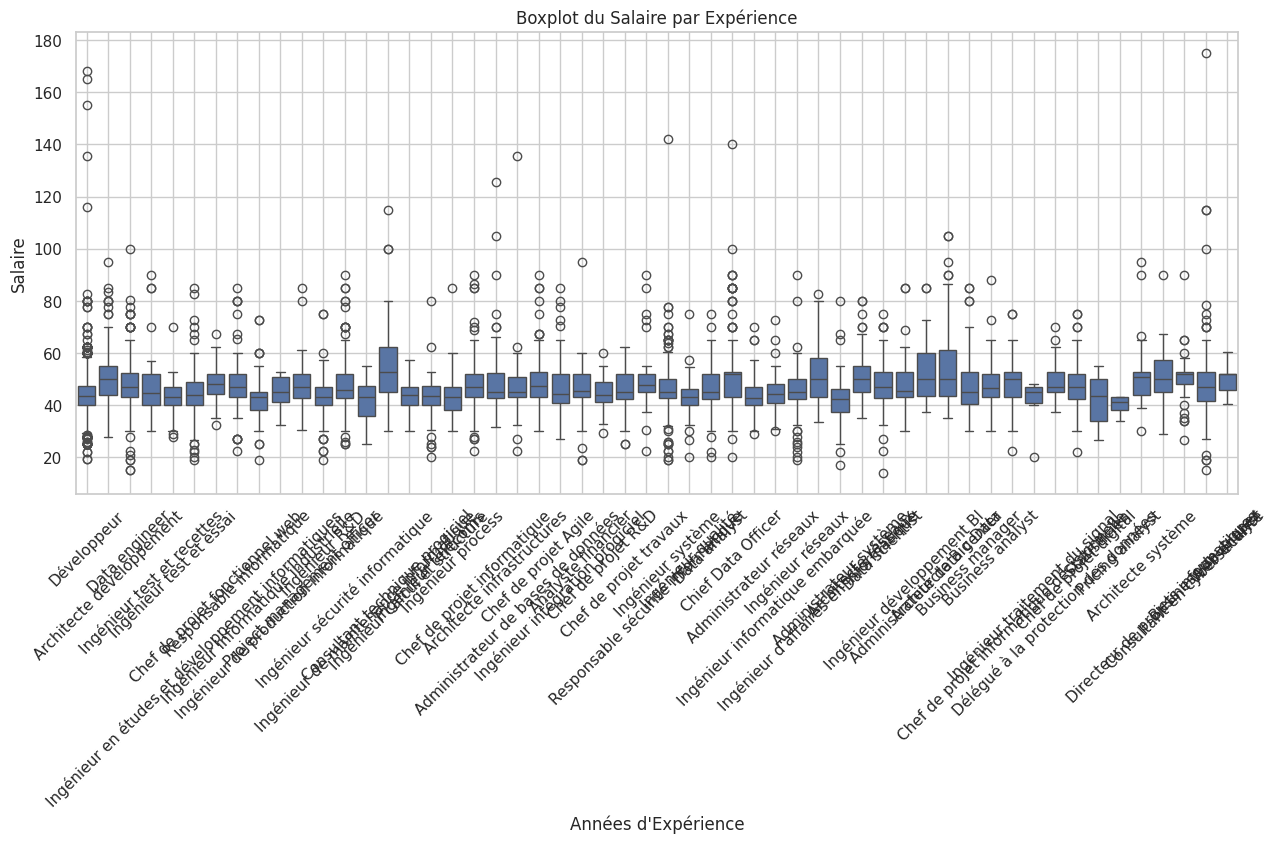

In [41]:
plt.figure(figsize=(15, 6))  # Ajustez la taille de la figure au besoin
sns.boxplot(x='metier', y='salaire', data=df)
plt.title('Boxplot du Salaire par Expérience')
plt.xlabel('Années d\'Expérience')
plt.ylabel('Salaire')
plt.xticks(rotation=45)  # Faire pivoter les étiquettes d'expérience pour une meilleure lisibilité
plt.grid(True)  # Ajouter une grille pour une meilleure visualisation
plt.show()

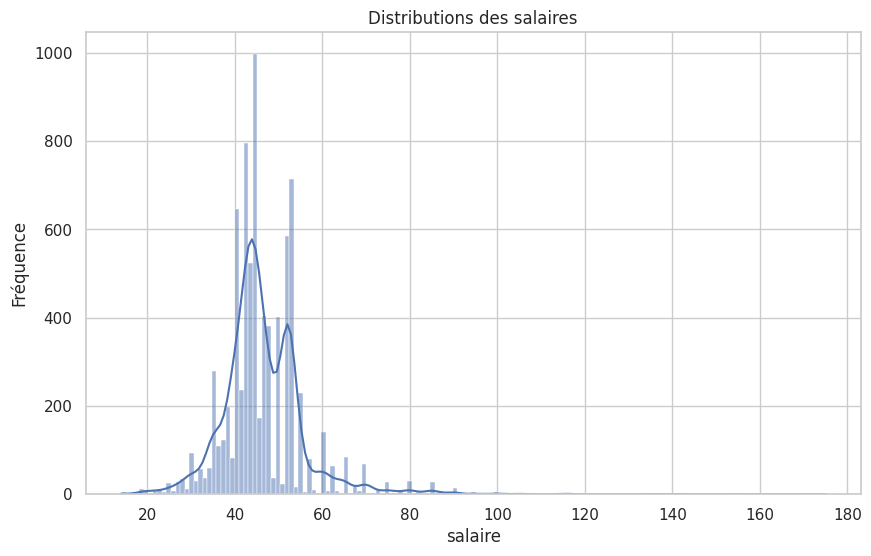

In [42]:
# Visualisation des distributions
plt.figure(figsize=(10, 6))
sns.histplot(df['salaire'], kde=True)
plt.title('Distributions des salaires')
plt.xlabel('salaire')
plt.ylabel('Fréquence')
plt.show()


## Salaire secteur privé VS public :

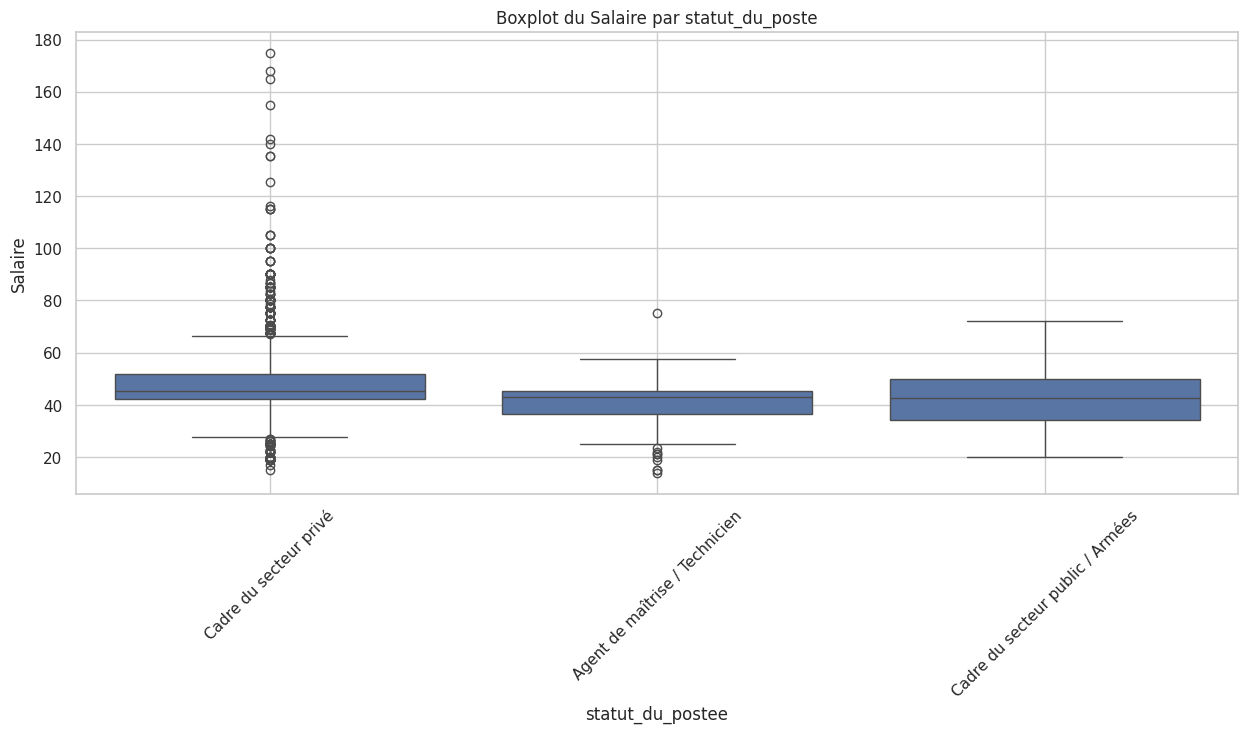

In [43]:
plt.figure(figsize=(15, 6))  # Ajustez la taille de la figure au besoin
sns.boxplot(x='statut_du_poste', y='salaire', data=df)
plt.title('Boxplot du Salaire par statut_du_poste')
plt.xlabel('statut_du_postee')
plt.ylabel('Salaire')
plt.xticks(rotation=45)  # Faire pivoter les étiquettes d'expérience pour une meilleure lisibilité
plt.grid(True)  # Ajouter une grille pour une meilleure visualisation
plt.show()

# 3. Analyse de corrélation

Il faut renettoyer les colone departement de chaque dataframe à faire à la main je pense

In [44]:
df_merged = df[["departement", "salaire"]].merge(df_chomage, on="departement", how="left")
df_merged = df_merged.merge(df_pop[["Superficie [en km²]"	,"Population"	,"Densite [hab. /km²]",	"departement"]], on="departement", how="left")
df_merged = df_merged.merge(df_pauvrete[["departement","taux de pauvrete total"]], on="departement", how="left")
df_merged = df_merged.merge(logement_df, on="departement", how="left")
df_merged

,departement,salaire,3ᵉ trim. 2023 (p),2ᵉ trim. 2023,3ᵉ trim. 2022,Superficie [en km²],Population,Densite [hab. /km²],taux de pauvrete total,code_postal,Nombre de logements sociaux pour 10 000 habitants,Part des logements sociaux de type individuel (en %),Part des logements sociaux de type collectif (en %),Loyer moyen par mètre carré de surface habitable (en €)
0,Bouches-du-Rhône,40.00000,8.6,8.5,8.7,5087.0,1906000.0,375.0,18.5,13,801,6.0,94.0,6.21
1,Bouches-du-Rhône,40.00000,8.6,8.5,8.7,5087.0,1906000.0,375.0,18.5,13,801,6.0,94.0,6.21
2,Bouches-du-Rhône,47.50000,8.6,8.5,8.7,5087.0,1906000.0,375.0,18.5,13,801,6.0,94.0,6.21
3,Bouches-du-Rhône,36.00000,8.6,8.5,8.7,5087.0,1906000.0,375.0,18.5,13,801,6.0,94.0,6.21
4,Bouches-du-Rhône,40.00000,8.6,8.5,8.7,5087.0,1906000.0,375.0,18.5,13,801,6.0,94.0,6.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8037,Lot-et-Garonne,52.50000,7.2,7.1,7.4,5361.0,305380.0,57.0,17.7,47,350,30.5,69.5,5.40
8038,Lot-et-Garonne,52.50000,7.2,7.1,7.4,5361.0,305380.0,57.0,17.7,47,350,30.5,69.5,5.40
8039,Haute-Marne,34.00000,6.8,6.4,6.3,6211.0,186500.0,30.0,15.3,52,935,18.9,81.1,5.25
8040,Haute-Marne,22.50000,6.8,6.4,6.3,6211.0,186500.0,30.0,15.3,52,935,18.9,81.1,5.25


In [45]:
df_merged

,departement,salaire,3ᵉ trim. 2023 (p),2ᵉ trim. 2023,3ᵉ trim. 2022,Superficie [en km²],Population,Densite [hab. /km²],taux de pauvrete total,code_postal,Nombre de logements sociaux pour 10 000 habitants,Part des logements sociaux de type individuel (en %),Part des logements sociaux de type collectif (en %),Loyer moyen par mètre carré de surface habitable (en €)
0,Bouches-du-Rhône,40.00000,8.6,8.5,8.7,5087.0,1906000.0,375.0,18.5,13,801,6.0,94.0,6.21
1,Bouches-du-Rhône,40.00000,8.6,8.5,8.7,5087.0,1906000.0,375.0,18.5,13,801,6.0,94.0,6.21
2,Bouches-du-Rhône,47.50000,8.6,8.5,8.7,5087.0,1906000.0,375.0,18.5,13,801,6.0,94.0,6.21
3,Bouches-du-Rhône,36.00000,8.6,8.5,8.7,5087.0,1906000.0,375.0,18.5,13,801,6.0,94.0,6.21
4,Bouches-du-Rhône,40.00000,8.6,8.5,8.7,5087.0,1906000.0,375.0,18.5,13,801,6.0,94.0,6.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8037,Lot-et-Garonne,52.50000,7.2,7.1,7.4,5361.0,305380.0,57.0,17.7,47,350,30.5,69.5,5.40
8038,Lot-et-Garonne,52.50000,7.2,7.1,7.4,5361.0,305380.0,57.0,17.7,47,350,30.5,69.5,5.40
8039,Haute-Marne,34.00000,6.8,6.4,6.3,6211.0,186500.0,30.0,15.3,52,935,18.9,81.1,5.25
8040,Haute-Marne,22.50000,6.8,6.4,6.3,6211.0,186500.0,30.0,15.3,52,935,18.9,81.1,5.25


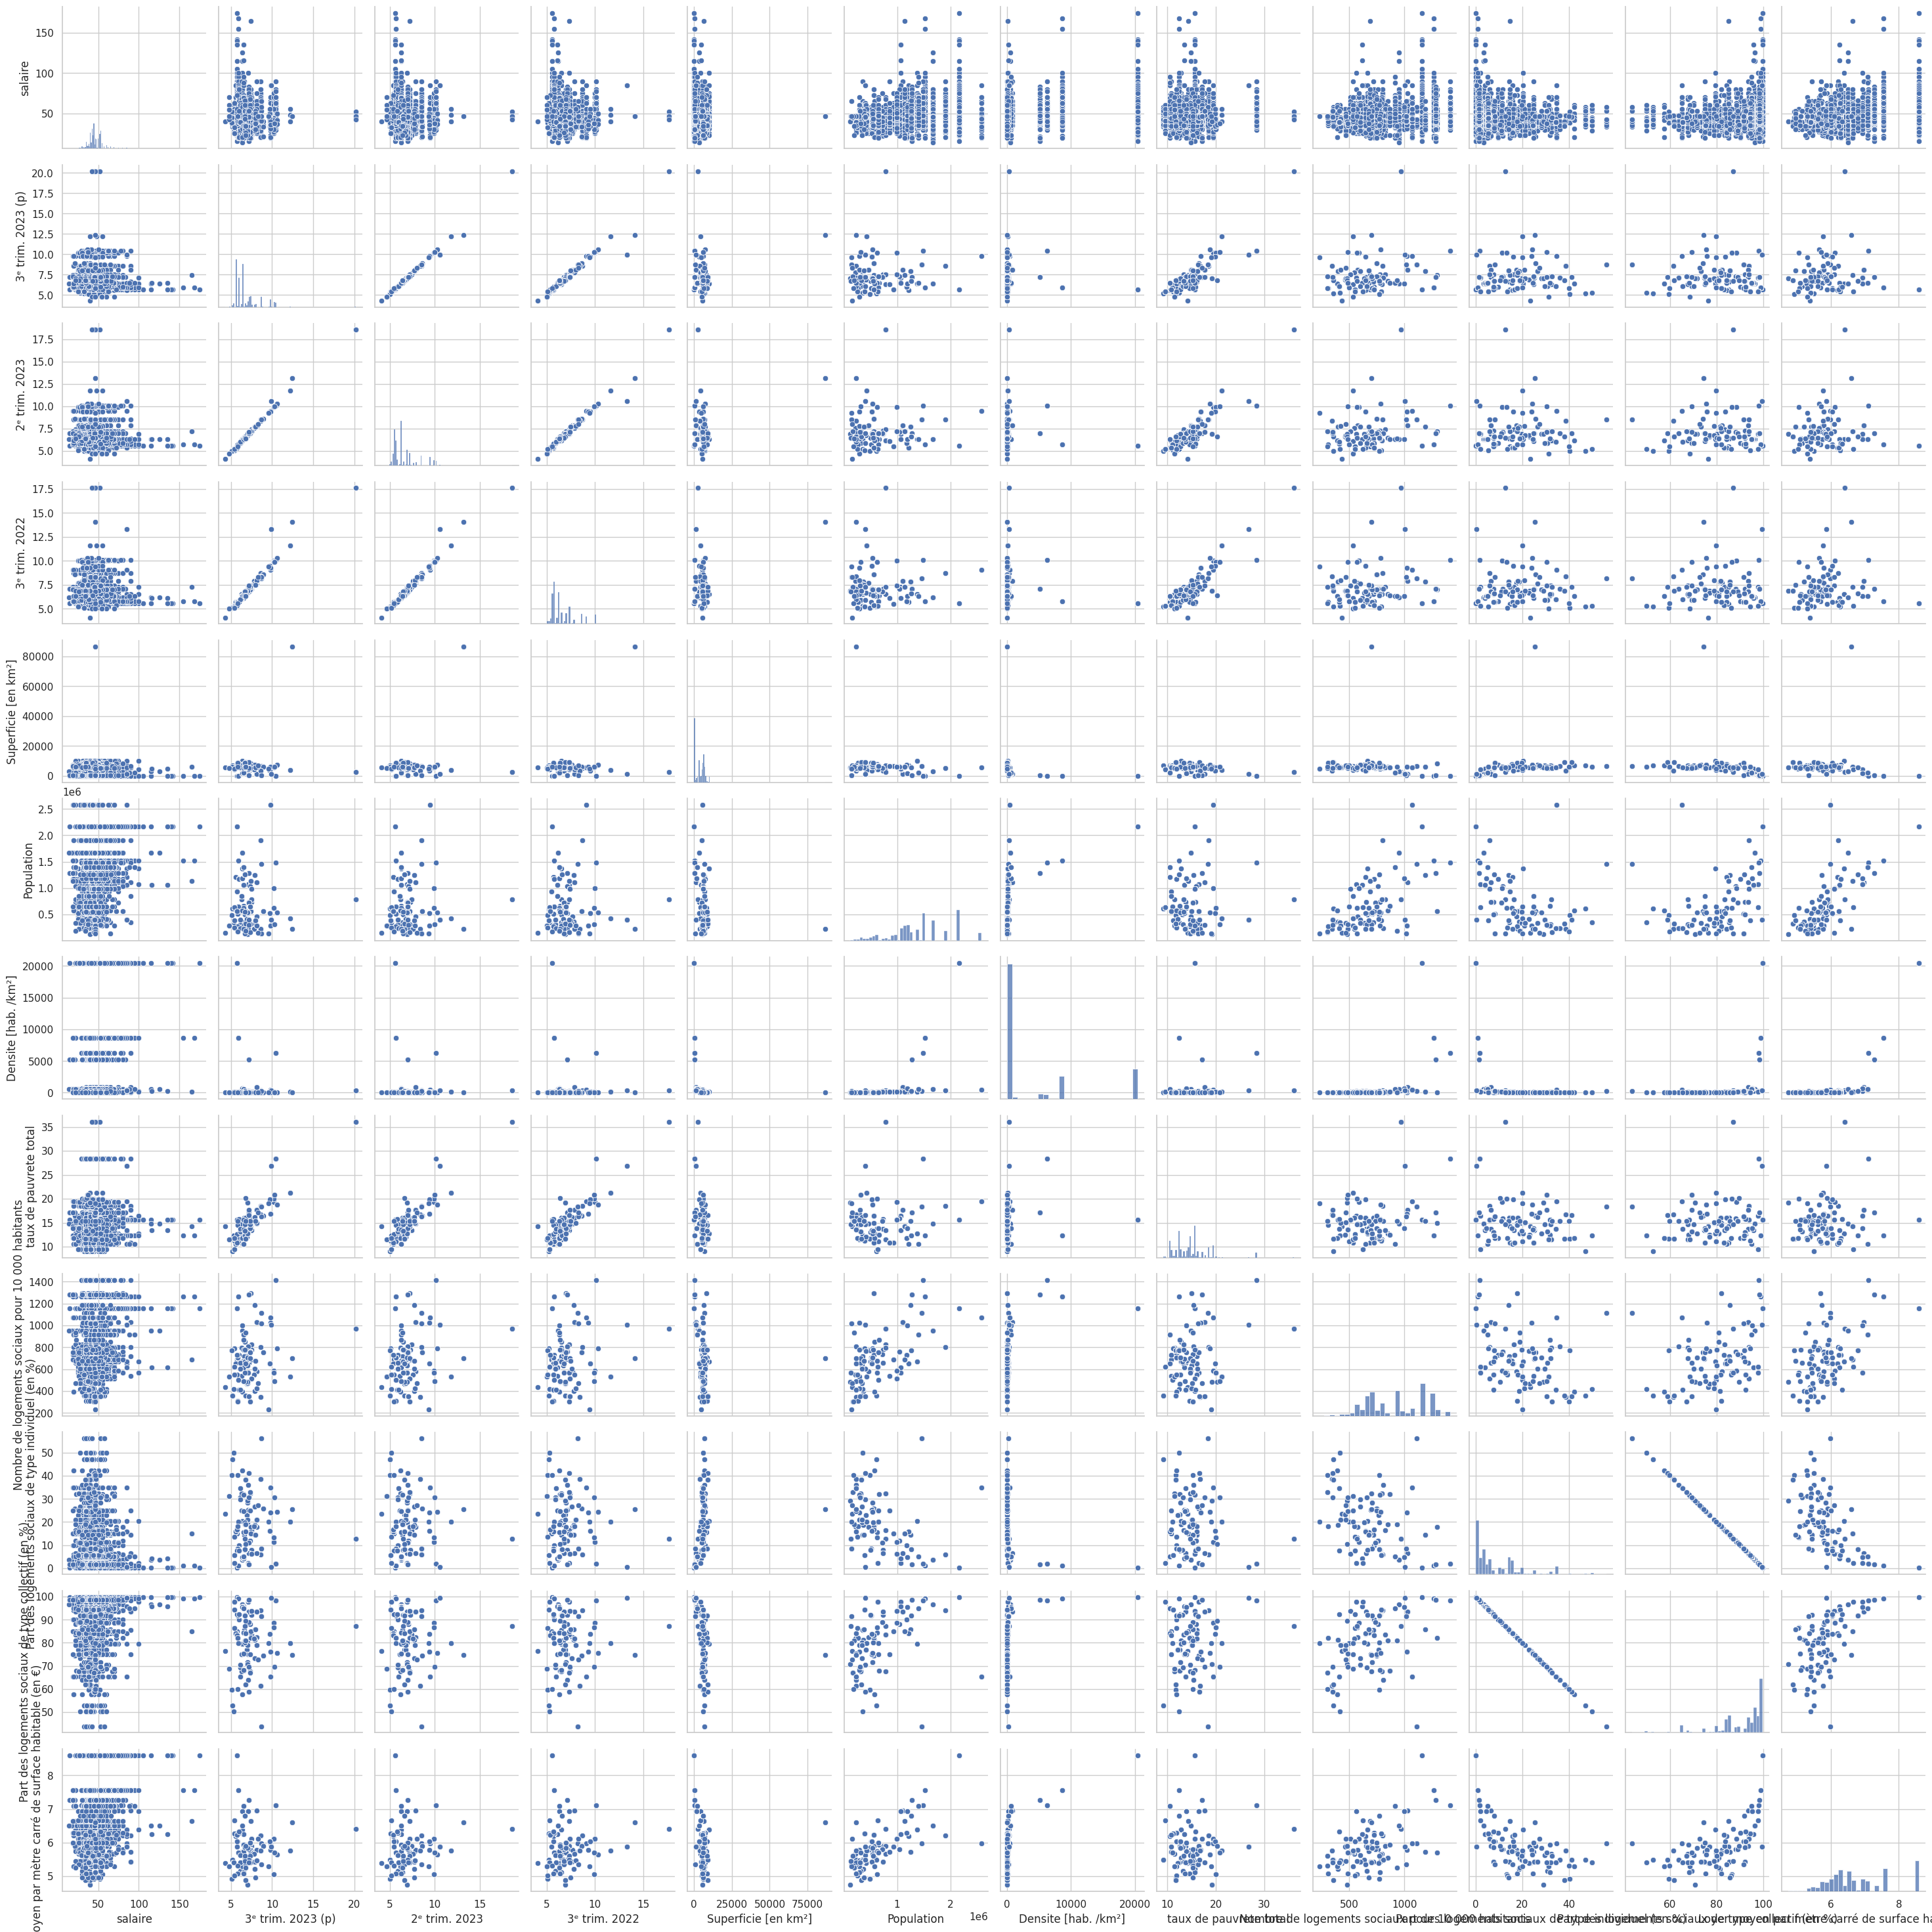

In [46]:
sns.pairplot(df_merged)

il y a des colonne qu'il faut rendre de type numérique 

In [47]:
colonnes_numeriques = df_merged.select_dtypes(include='number')
colonnes_numeriques

,salaire,3ᵉ trim. 2023 (p),2ᵉ trim. 2023,3ᵉ trim. 2022,Superficie [en km²],Population,Densite [hab. /km²],taux de pauvrete total,Nombre de logements sociaux pour 10 000 habitants,Part des logements sociaux de type individuel (en %),Part des logements sociaux de type collectif (en %),Loyer moyen par mètre carré de surface habitable (en €)
0,40.00000,8.6,8.5,8.7,5087.0,1906000.0,375.0,18.5,801,6.0,94.0,6.21
1,40.00000,8.6,8.5,8.7,5087.0,1906000.0,375.0,18.5,801,6.0,94.0,6.21
2,47.50000,8.6,8.5,8.7,5087.0,1906000.0,375.0,18.5,801,6.0,94.0,6.21
3,36.00000,8.6,8.5,8.7,5087.0,1906000.0,375.0,18.5,801,6.0,94.0,6.21
4,40.00000,8.6,8.5,8.7,5087.0,1906000.0,375.0,18.5,801,6.0,94.0,6.21
...,...,...,...,...,...,...,...,...,...,...,...,...
8037,52.50000,7.2,7.1,7.4,5361.0,305380.0,57.0,17.7,350,30.5,69.5,5.40
8038,52.50000,7.2,7.1,7.4,5361.0,305380.0,57.0,17.7,350,30.5,69.5,5.40
8039,34.00000,6.8,6.4,6.3,6211.0,186500.0,30.0,15.3,935,18.9,81.1,5.25
8040,22.50000,6.8,6.4,6.3,6211.0,186500.0,30.0,15.3,935,18.9,81.1,5.25


<Axes: >

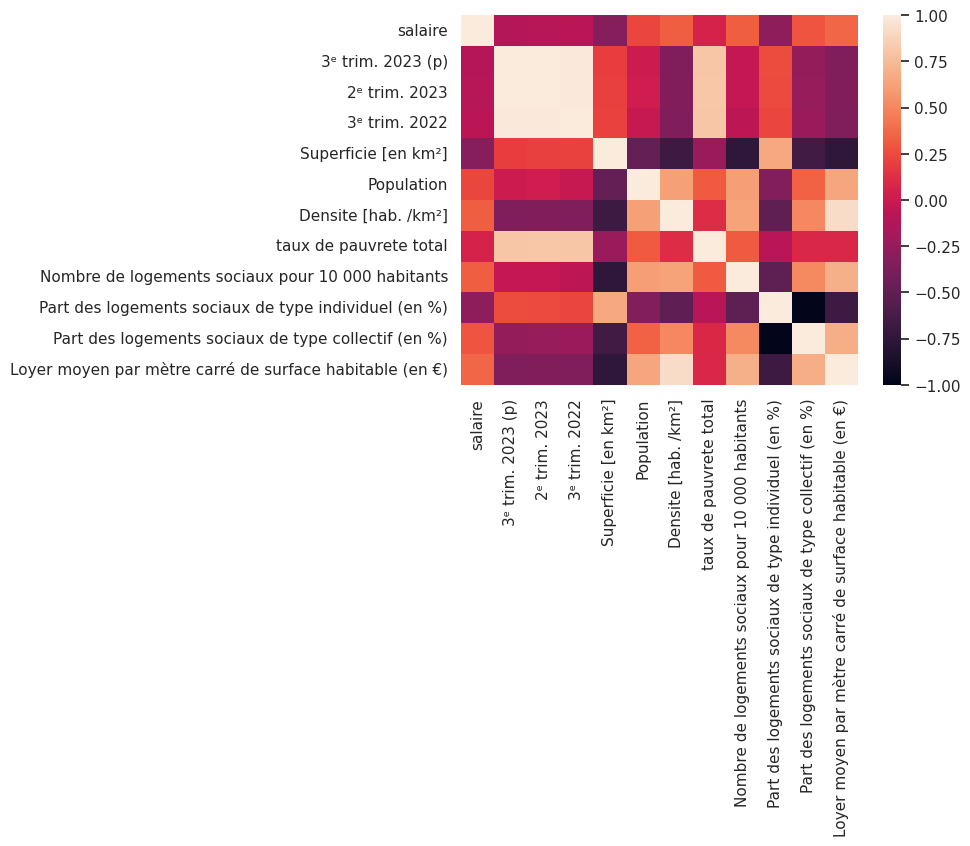

In [48]:
corr = colonnes_numeriques.corr()
sns.heatmap(corr)